In [1]:
# Importa librerias
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importa el dataset
df = pd.read_csv("C:/Users/LUIS MEZA/Desktop/UNAD\ANALISIS DE DATOS/FASE 4/archive/Cleaned-Data.csv")
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [3]:
# Filtrar el DataFrame para incluir solo a los pacientes con Diarrhea
df_filtered = df[df['Diarrhea'] == 1]

In [4]:
# Realizar la codificación one-hot para la columna 'Country'
encoder = OneHotEncoder(sparse_output=False)
encoded_countries = encoder.fit_transform(df_filtered[['Country']])
encoded_countries_df = pd.DataFrame(encoded_countries, columns=encoder.get_feature_names_out(['Country']))
df_filtered = df_filtered.reset_index(drop=True)
df_encoded = pd.concat([df_filtered, encoded_countries_df], axis=1)
df_encoded.columns = [column.replace(' ', '_') for column in df_encoded.columns]
df_encoded = df_encoded.drop('Country', axis=1)
df_encoded

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Country_China,Country_France,Country_Germany,Country_Iran,Country_Italy,Country_Other,Country_Other-EUR,Country_Republic_of_Korean,Country_Spain,Country_UAE
0,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,1,1,0,1,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115195,0,0,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
115196,0,0,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
115197,0,0,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
115198,0,0,0,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [5]:
# Definir las características y la variable objetivo
X = df_encoded.drop('Severity_Moderate', axis=1)
y = df_encoded['Severity_Moderate']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [7]:
# Inicializar el clasificador Naive Bayes
nb = GaussianNB()

In [8]:
# Entrenar el clasificador Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [10]:
# Hacer predicciones en el conjunto de prueba
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17305
           1       1.00      1.00      1.00      5735

    accuracy                           1.00     23040
   macro avg       1.00      1.00      1.00     23040
weighted avg       1.00      1.00      1.00     23040

[[17305     0]
 [    0  5735]]


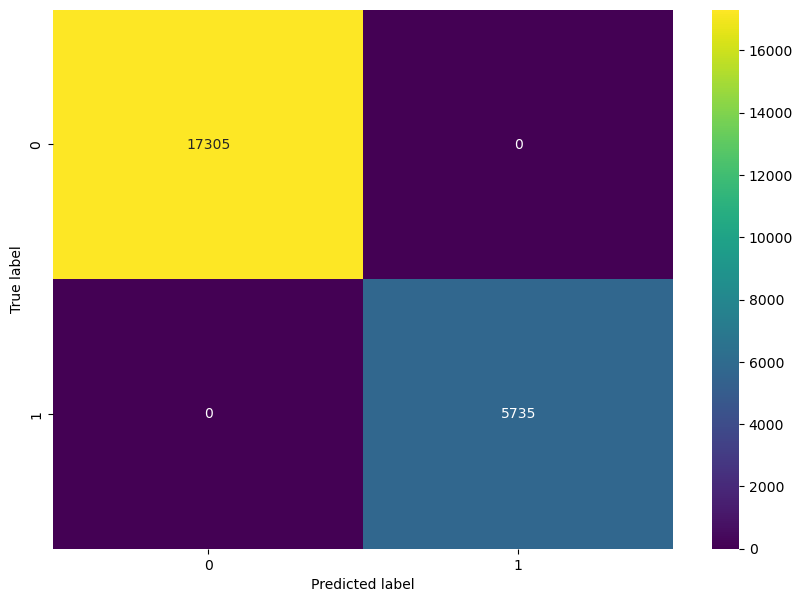

In [11]:
cm = confusion_matrix(y_test, y_pred)
# Crea la figura de matplotlib
plt.figure(figsize=(10, 7))
# Crea el heatmap de Seaborn utilizando la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
# Añade los títulos y las etiquetas
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()